In [1]:
from scimath.units.length import meters as m
from scimath.units.length import kilometers as km
from scimath.units.length import light_year as ly
from scimath.units.mass import kilograms as kg
from scimath.units.time import seconds as s
from scimath.units.time import years as yr
from scimath.units.length import astronomical_unit
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src.constants import G, c, solar_mass, g
from src.utils import v_escape_solar
from src.engine import Engine
from src.starship import Starship
from src.solar_sail import SolarSail
from src.swimmer import Swimmer
%matplotlib inline

## Inertia Mission Planning

This notebook is for planning mission scenarios discussed in the novel

In [12]:
initial_fuel_mass = 6.6e10 * kg
sail_area_density = 0.00003 * kg / m**2  # Carbon nanotube sheets
sail_radius = 6371 * km
sail_mass = sail_radius**2 * np.pi * sail_area_density
print(f'Sail mass is {sail_mass / kg} kg')
solar_sail = SolarSail(sail_mass, sail_radius, reflectivity=0.98)
eng = {'main': Engine(initial_fuel_mass)}
total_distance = 4.244 * ly
ss = Starship(6.6e10 * kg, eng, solar_sail=solar_sail, destination_distance=total_distance)


ss.wait(10 * yr)
initial_distance_to_sun = 0.01 * astronomical_unit
ti = ss.time
ss.position = initial_distance_to_sun
ss.sail(None, 
        position_of_star=0.0 * m,
        max_accel=3.0 * g)
tf = ss.time
distance_after_sail = ss.position
print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')
expected_sail_velocity = ss.solar_sail.final_velocity(ss.total_mass() - ss.solar_sail.sail_mass, initial_distance_to_sun)
sail_velocity = ss.velocity
print(f'Achieved {ss.velocity / expected_sail_velocity * 100}% of the target final velocity of {sail_velocity / c}c.')
# print(f'Sail time is {(tf - ti) / (3600 * 24 * s)} days.')
ss.accelerate(fuel_mass=0.6 * initial_fuel_mass, acceleration=0.0000058 * g)
ss.cruise(total_distance - ss.position - distance_after_sail)
ss.accelerate(target_velocity=sail_velocity, direction=-1, acceleration=0.0000058 * g)

print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')

ss.sail(0.0 * c,
        total_distance,
        max_accel=3.0 * g
        )
# try:
#     ss.accelerate(direction=-1)
# except ValueError:
#     ss.accelerate(direction=-1, fuel_mass=ss.fuel_mass())
ss.wait(10 * yr)
ss.print_history()


Sail mass is 3825483539.323412 kg
destination_distance: 4.244ly, position: 5.702565204153356e-05ly
Achieved 89.77243514353913% of the target final velocity of 0.0015036544470592604c.
destination_distance: 4.244ly, position: 4.346482611450373ly


{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Waited: 1.00e+01 years. Distance=0.00e+00 lightyears
{'time': 315576000.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing with velocity 0.000999999999999332 m/s with acceleration 3.0000000000000004g.
{'time': 315576000.000034*s, 'position': 1495980000.0*m, 'velocity': 0.000999999999999332*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing with velocity 0.01099999999999265 m/s with acceleration 3.0000000000000004g.
{'time': 315576000.0003738*s, 'position': 1495980000.000002*m, 'velocity': 0.01099999999999265*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing with velocity 0.

<ipython-input-13-08476407d92d>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


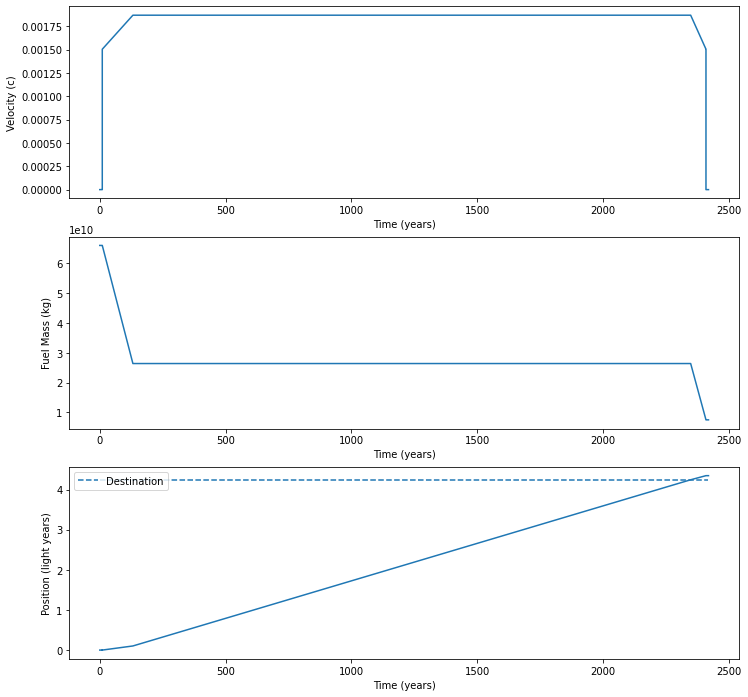

In [13]:
fig = ss.plot_history(show_destination=True)
fig.show()

## Example: SWIMMER mission abort

In [24]:
initial_fuel_mass = 6.6e10 * kg
sail_area_density = 0.00003 * kg / m**2  # Carbon nanotube sheets
sail_radius = 6371 * km
sail_mass = sail_radius**2 * np.pi * sail_area_density
print(f'Sail mass is {sail_mass / kg} kg')
solar_sail = SolarSail(sail_mass, sail_radius, reflectivity=0.98)
graphene_density = 0.763e-6 * kg / m ** 2
pusher_area = np.pi * (7.0e8 * m) ** 2
swimmer = Swimmer(pusher_area, graphene_density)
eng = {'main': Engine(initial_fuel_mass)}
total_distance = 4.244 * ly
ss = Starship(6.6e10 * kg, eng, solar_sail=solar_sail, swimmer=swimmer, destination_distance=total_distance)


ss.wait(10 * yr)
initial_distance_to_sun = 0.01 * astronomical_unit
ti = ss.time
ss.position = initial_distance_to_sun
ss.sail(None, 
        0.0 * m,
        max_accel=3.0 * g)
tf = ss.time
distance_after_sail = ss.position
print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')
expected_sail_velocity = ss.solar_sail.final_velocity(ss.total_mass() - ss.solar_sail.sail_mass, initial_distance_to_sun)
sail_velocity = ss.velocity
print(f'Achieved {ss.velocity / expected_sail_velocity * 100}% of the target final velocity of {sail_velocity / c}c.')
# print(f'Sail time is {(tf - ti) / (3600 * 24 * s)} days.')
ss.accelerate(fuel_mass=0.6 * initial_fuel_mass, acceleration=0.0000058 * g)


swim_power = 7.0e15 * kg * m ** 2 / s ** 3
# TODO: We will likely want to run engines at slow speeds.
ss.swim(swim_power, 25 * yr, direction=-1)
ss.accelerate(fuel_mass=0.2 * initial_fuel_mass, acceleration=0.0000058 * g, direction=-1)
ss.swim(swim_power, 10 * yr, direction=-1)
ss.cruise(ss.position - distance_after_sail)
# ss.accelerate(target_velocity=sail_velocity, decelerate=True, acceleration=0.0000058 * g)

print(f'destination_distance: {ss.destination_distance / ly}ly, position: {ss.position / ly}ly')

ss.sail(0.0 * c,
        total_distance,
        max_accel=3.0 * g
        )
try:
    ss.accelerate()
except ValueError:
    ss.accelerate(fuel_mass=ss.fuel_mass())
ss.wait(10 * yr)
ss.print_history()


Sail mass is 3825483539.323412 kg
destination_distance: 4.244ly, position: 1.6851673173921884e-06ly
Achieved 94.48145778122824% of the target final velocity of 0.0005095007521909554c.
destination_distance: 4.244ly, position: 1.6851673173923098e-06ly


{'time': 0.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 0.0 - Waited: 1.00e+01 years. Distance=0.00e+00 lightyears
{'time': 315576000.0*s, 'position': 0.0*m, 'velocity': 0.0*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing with velocity 0.0009999999999993313 m/s with acceleration 0.8774239807347661g.
{'time': 315576000.00011617*s, 'position': 1495980000.0*m, 'velocity': 0.0009999999999993313*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing with velocity 0.010999999999992611 m/s with acceleration 0.8774239807347632g.
{'time': 315576000.0012779*s, 'position': 1495980000.0000067*m, 'velocity': 0.010999999999992611*m*s**-1, 'fuel_mass': 66000000000.0*kg}

year 10.0 - Sailing wit

No handles with labels found to put in legend.
<ipython-input-25-c92773e2b07a>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


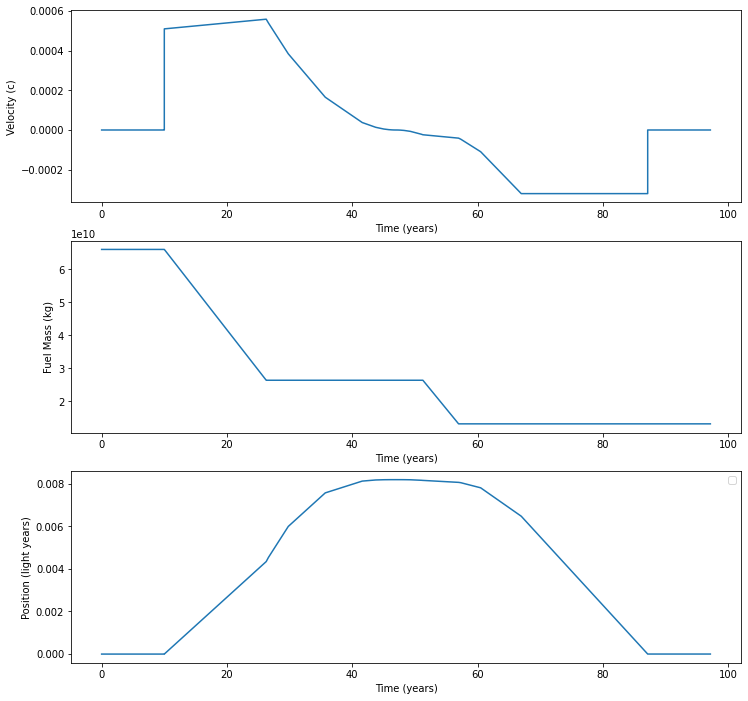

In [25]:
fig = ss.plot_history(show_destination=False)
fig.show()